In [1]:
import scipy.spatial.distance as distance
import numpy
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tabulate import tabulate

In [2]:
data                =   numpy.array([
(5.0, 3.0, 4.77),
(3.0, 6.0, 6.96),
(3.0, 2.0, 2.27),
(4.0, 9.0, 6.46),
(6.0, 9.0, 6.06),
(6.0, 8.0, 7.91),
(9.0, 1.0, 7.83)
    ] , dtype=float)
data_names          =   numpy.array([ 
    'A' , 'B' , 'C' , 'D' , 'E' , 'F', 'G' 
    ])
targets             =   numpy.array([
    (5, 4),
    (6,4),
    (4,7)
    ] , dtype=float)
targets_names       =   numpy.array([
    'T1' , 'T2' , 'T3'
    ])
sill    =   1.0
nugget  =   0.1
Range   =   5.0
Method  =   "OK"
# extract names out for making a homogenous numpy array, making easier to use its built-in functions
assert len(data) == len(data_names)
assert len(targets) == len(targets_names)

In [3]:
printarray = lambda numpyarray: numpy.savetxt( sys.stdout , numpyarray , fmt = "% .3f" ) if not isinstance(numpyarray,str) else  numpy.savetxt( sys.stdout , numpyarray , fmt = "%s" )
printarray( data)

 5.000  3.000  4.770
 3.000  6.000  6.960
 3.000  2.000  2.270
 4.000  9.000  6.460
 6.000  9.000  6.060
 6.000  8.000  7.910
 9.000  1.000  7.830


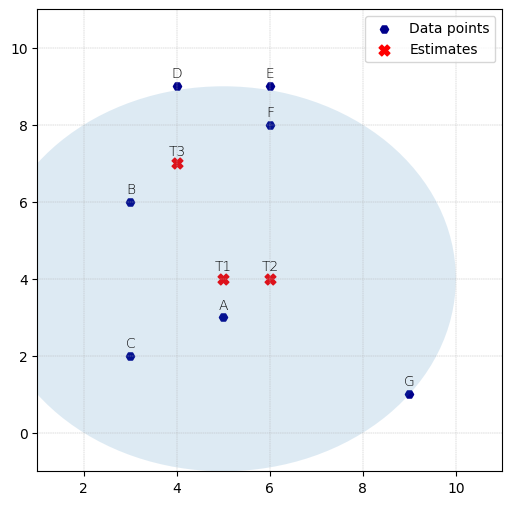

In [4]:
fig = plt.figure( figsize=(6,6))
plt.xlim( min(data[:,0] )-2 , max(data[:,0] )+2 )
plt.ylim( min(data[:,1] )-2 , max(data[:,1] )+2 )
plt.scatter( x=data[:,0] , y=data[:,1] , marker='H' , s=35 , c='darkblue' , label = "Data points")
plt.scatter( x=targets[:,0] , y=targets[:,1] , marker='X' , s=60 , c='Red' , label = "Estimates")
for name_,val_ in zip(data_names,data):
    plt.annotate(text=name_ , xy=(val_[0] , val_[1]) , xytext=(0,9) , textcoords='offset points' , horizontalalignment='center', verticalalignment = "center" , fontweight = 'light')
for name_,val_ in zip(targets_names,targets):
    plt.annotate(text=name_ , xy=(val_[0] , val_[1]) , xytext=(0,9) , textcoords='offset points' , horizontalalignment='center', verticalalignment = "center" , fontweight = 'light')    
plt.grid(True , linestyle = '--' , linewidth = 0.3)

# find relative circle center point in the plot
# drawing variogram model only for first estimate point

fig.axes[0].add_patch(patches.Circle( targets[0], Range , alpha = 0.15))
plt.legend()

In [5]:
# Calculating distance of the points relatively against each other
dist = distance.squareform(distance.pdist(data[:,:2] ) )
print( "matrix of distances :" )
printarray( dist )
# Calculating distance of targets relatively to known-value points
targetdist = distance.cdist( targets , data[:,:2] )
print( "\nmatrix of target distance:" )
printarray( targetdist )

matrix of distances :
 0.000  3.606  2.236  6.083  6.083  5.099  4.472
 3.606  0.000  4.000  3.162  4.243  3.606  7.810
 2.236  4.000  0.000  7.071  7.616  6.708  6.083
 6.083  3.162  7.071  0.000  2.000  2.236  9.434
 6.083  4.243  7.616  2.000  0.000  1.000  8.544
 5.099  3.606  6.708  2.236  1.000  0.000  7.616
 4.472  7.810  6.083  9.434  8.544  7.616  0.000

matrix of target distance:
 1.000  2.828  2.828  5.099  5.099  4.123  5.000
 1.414  3.606  3.606  5.385  5.000  4.000  4.243
 4.123  1.414  5.099  2.000  2.828  2.236  7.810


In [6]:
''' 
    Defining semivariogram model

    * parameter 'h' can be both numeric or numpy list of numbers
    * Consequently, the output would be as same type as 'h'

'''
def semivariogram_model( h , nugget , sill , _range_ ):
    return numpy.piecewise( h , [ h <= _range_ , h > _range_ ] , [lambda h: nugget + ( sill-nugget )*( 1.5*(h/_range_) - 0.5*(h/_range_)**3), sill ] )

# Calculating gamma values of samples against each other
semivariance_matrix = semivariogram_model( dist , nugget , sill , Range )
print( "Matrix of semivariance :")
printarray( semivariance_matrix  )

# Calculating gamma values of samples against estimate points
semivariance_matrix_target = semivariogram_model( targetdist , nugget , sill , Range )
print( "\nMatrix of semivariance ( target ) :"  )
printarray( semivariance_matrix_target )

Matrix of semivariance :
 0.100  0.905  0.663  1.000  1.000  1.000  0.985
 0.905  0.100  0.950  0.840  0.971  0.905  1.000
 0.663  0.950  0.100  1.000  1.000  1.000  1.000
 1.000  0.840  1.000  0.100  0.611  0.663  1.000
 1.000  0.971  1.000  0.611  0.100  0.366  1.000
 1.000  0.905  1.000  0.663  0.366  0.100  1.000
 0.985  1.000  1.000  1.000  1.000  1.000  0.100

Matrix of semivariance ( target ) :
 0.366  0.782  0.782  1.000  1.000  0.961  1.000
 0.472  0.905  0.905  1.000  1.000  0.950  0.971
 0.961  0.472  1.000  0.611  0.782  0.663  1.000


In [7]:
# Calculating both covariance matrixes bu substracting from the 'sill'
covariance_matrix = sill - semivariance_matrix
print( "Covariance matrix:" )
printarray(covariance_matrix)
covariance_matrix_target = sill - semivariance_matrix_target
print( "\nCovariance matrix target:" )
printarray(covariance_matrix_target)

Covariance matrix:
 0.900  0.095  0.337  0.000  0.000  0.000  0.015
 0.095  0.900  0.050  0.160  0.029  0.095  0.000
 0.337  0.050  0.900  0.000  0.000  0.000  0.000
 0.000  0.160  0.000  0.900  0.389  0.337  0.000
 0.000  0.029  0.000  0.389  0.900  0.634  0.000
 0.000  0.095  0.000  0.337  0.634  0.900  0.000
 0.015  0.000  0.000  0.000  0.000  0.000  0.900

Covariance matrix target:
 0.634  0.218  0.218  0.000  0.000  0.039  0.000
 0.528  0.095  0.095  0.000  0.000  0.050  0.029
 0.039  0.528  0.000  0.389  0.218  0.337  0.000


In [8]:
# Since the relative distances of samples are same against each other for all targets, matrix 'K' would be constant for all solutions
# Assuming Ordinary Kriging for now
K = numpy.vstack( ( numpy.hstack( ( covariance_matrix , numpy.ones( (data.shape[0] , 1 ) ) ) ) , numpy.ones( (1 , data.shape[0]+1 ) ) ) )
K[ -1 , -1 ] = 0
print( "K matrix:" )
printarray(K)

# Same story for matrix 'k' for all estimate points
k = numpy.hstack( ( covariance_matrix_target , numpy.ones( (len(targets),1) ) ) )
print( "\nk matrix:" )
printarray(k)

K matrix:
 0.900  0.095  0.337  0.000  0.000  0.000  0.015  1.000
 0.095  0.900  0.050  0.160  0.029  0.095  0.000  1.000
 0.337  0.050  0.900  0.000  0.000  0.000  0.000  1.000
 0.000  0.160  0.000  0.900  0.389  0.337  0.000  1.000
 0.000  0.029  0.000  0.389  0.900  0.634  0.000  1.000
 0.000  0.095  0.000  0.337  0.634  0.900  0.000  1.000
 0.015  0.000  0.000  0.000  0.000  0.000  0.900  1.000
 1.000  1.000  1.000  1.000  1.000  1.000  1.000  0.000

k matrix:
 0.634  0.218  0.218  0.000  0.000  0.039  0.000  1.000
 0.528  0.095  0.095  0.000  0.000  0.050  0.029  1.000
 0.039  0.528  0.000  0.389  0.218  0.337  0.000  1.000


In [9]:
# Calculatig Inversed matrix of 'K'
K_inv = numpy.linalg.inv( K )
print ( "Inversed K :" )
printarray(K_inv)

Inversed K :
 1.203 -0.233 -0.595 -0.059 -0.092 -0.046 -0.177  0.142
-0.233  1.038 -0.156 -0.318  0.084 -0.235 -0.181  0.166
-0.595 -0.156  1.163 -0.088 -0.088 -0.067 -0.169  0.161
-0.059 -0.318 -0.088  1.359 -0.556 -0.211 -0.127  0.115
-0.092  0.084 -0.088 -0.556  2.327 -1.557 -0.117  0.106
-0.046 -0.235 -0.067 -0.211 -1.557  2.213 -0.097  0.088
-0.177 -0.181 -0.169 -0.127 -0.117 -0.097  0.868  0.221
 0.142  0.166  0.161  0.115  0.106  0.088  0.221 -0.201


In [10]:
# Calculating Weights ( and Mu values )
Landas = (k@K_inv)

'''
    We used 'tabulate' module to regularize the output, however all can be done manually with format function as well!
    first we need to reshape names matrixes and then stack to landas from left
'''
print( tabulate( numpy.hstack( (targets_names.reshape((len(targets),1)) , Landas) ) ,
                 headers=numpy.concatenate([["Point Names \ Weights"],data_names,["μ"]]) , 
                 tablefmt='rounded_grid' , 
                 numalign="left" , 
                 floatfmt=".3f" )  )


╭─────────────────────────┬───────┬───────┬────────┬────────┬────────┬───────┬───────┬────────╮
│ Point Names \ Weights   │ A     │ B     │ C      │ D      │ E      │ F     │ G     │ μ      │
├─────────────────────────┼───────┼───────┼────────┼────────┼────────┼───────┼───────┼────────┤
│ T1                      │ 0.722 │ 0.201 │ 0.001  │ -0.019 │ -0.014 │ 0.079 │ 0.029 │ -0.036 │
├─────────────────────────┼───────┼───────┼────────┼────────┼────────┼───────┼───────┼────────┤
│ T2                      │ 0.691 │ 0.110 │ -0.066 │ 0.031  │ -0.025 │ 0.143 │ 0.115 │ -0.084 │
├─────────────────────────┼───────┼───────┼────────┼────────┼────────┼───────┼───────┼────────┤
│ T3                      │ 0.007 │ 0.521 │ -0.020 │ 0.281  │ -0.086 │ 0.286 │ 0.011 │ -0.010 │
╰─────────────────────────┴───────┴───────┴────────┴────────┴────────┴───────┴───────┴────────╯


In [11]:
# Calculating estimates and associated variance(s)
Estimation = Landas[:,:-1]@data[:,2]
Variance = sill - Landas@k[0]

print( tabulate( numpy.hstack( ( targets_names.reshape((len(targets),1)) , Estimation.reshape( (len(targets),1 ) ),Variance.reshape( (len(targets),1 ) ) ) ) ,
                 headers=["Point names" , "Estimates" , "Variance"] , 
                 tablefmt='rounded_grid' , 
                 numalign="left" , 
                 floatfmt=".3f" )  )

╭───────────────┬─────────────┬────────────╮
│ Point names   │ Estimates   │ Variance   │
├───────────────┼─────────────┼────────────┤
│ T1            │ 5.496       │ 0.532      │
├───────────────┼─────────────┼────────────┤
│ T2            │ 5.996       │ 0.631      │
├───────────────┼─────────────┼────────────┤
│ T3            │ 7.259       │ 0.885      │
╰───────────────┴─────────────┴────────────╯


#### Later: plot of points vs estimated points + decorations $ \lambda + \mu + tables$